# Flight Data Analytics

## Overview
Flight Data Analytics analyzes aviation accident data to identify aircraft with the lowest risk for business expansion. The analysis leverages accident data to inform decisions on aircraft acquisition for commercial and private enterprises.

## Business Problem
Our company is expanding into aviation and needs to evaluate potential risks associated with different aircraft. The goal is to determine which aircraft are safest and align with the company’s new aviation business venture.

## Data Understanding
The data is sourced from the National Transportation Safety Board (NTSB), covering aviation accidents from 1962 to 2023. It includes accident severity, aircraft type, injury statistics, and more.


In [31]:
#importing standard libraries

from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns


In [32]:
pd.set_option("display.max_columns",500) #This allows me to look at all columns of the data frame

data=pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Phase 1 project\AviationData.csv",encoding="ISO-8859-1",dtype={6:str,7:str,28:str})  #Importing the data from my hard drive

In [33]:
df=data.copy()#Create a copy of the data to use for manipulation
df.head() #Check the first five rows


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [34]:
df.shape

(88889, 31)

In [35]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [37]:
df.describe() #Statistical summary of my data frame

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [38]:
df.isnull().sum() #Check for null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

# DATA PREPARATION

## Data Cleaning

In [39]:
#Check and drop duplicates
df.duplicated().sum()

0

In [40]:
#Standardize column names
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_").str.replace(".","_")

In [41]:
df["make"]=df.make.str.lower()
df["weather_condition"]=df.weather_condition.str.lower()
df["broad_phase_of_flight"]=df.broad_phase_of_flight.str.lower()

In [42]:
#Drop columns with more than 50% of missing values
thresh=len(df)*0.5
df=df.loc[:,df.isnull().sum()<=thresh]

df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: int64

In [43]:
#Filling in numerical columns
numcol=["total_fatal_injuries", "total_serious_injuries","total_minor_injuries","total_uninjured" ]
#The numerical columns will be filled with [0]
df[numcol]=df[numcol].fillna(0)
df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: int64

In [44]:
#Categorical columns
catcol=["location","injury_severity","broad_phase_of_flight","weather_condition","country"]
#They will be filled with unknown
df[catcol]=df[catcol].fillna("unknown")

df.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                       0
airport_code              38757
airport_name              36185
injury_severity               0
aircraft_damage            3194
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
report_status              6384
publication_date          13771
dtype: int64

In [45]:
#Dropping columns not useful for the analysis
df=df.drop(columns=["airport_code","airport_name","registration_number","publication_date","accident_number",])





In [46]:
df.isnull().sum()

event_id                     0
investigation_type           0
event_date                   0
location                     0
country                      0
injury_severity              0
aircraft_damage           3194
make                        63
model                       92
amateur_built              102
number_of_engines         6084
engine_type               7096
purpose_of_flight         6192
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
broad_phase_of_flight        0
report_status             6384
dtype: int64

In [47]:
#Fill text-based columns with unknown
df['aircraft_damage'] = df['aircraft_damage'].fillna("Unknown")
df['make'] = df['make'].fillna("Unknown")
df['model'] = df['model'].fillna("Unknown")
df['engine_type'] = df['engine_type'].fillna("Unknown")
df['purpose_of_flight'] = df['purpose_of_flight'].fillna("Unknown")
df['report_status'] = df['report_status'].fillna("Unknown")

# Fill numeric column with 0
df['number_of_engines'] = df['number_of_engines'].fillna(0)

df.isnull().sum()

event_id                    0
investigation_type          0
event_date                  0
location                    0
country                     0
injury_severity             0
aircraft_damage             0
make                        0
model                       0
amateur_built             102
number_of_engines           0
engine_type                 0
purpose_of_flight           0
total_fatal_injuries        0
total_serious_injuries      0
total_minor_injuries        0
total_uninjured             0
weather_condition           0
broad_phase_of_flight       0
report_status               0
dtype: int64

In [48]:
#Drop all other null values
df=df.dropna(subset="amateur_built")

In [49]:
#Check our final data set with no null values
df.isnull().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
report_status             0
dtype: int64

# ANALYSIS

## 1. Accidents Trends overtime

This visualisation shows a steady decline of accidents altogether from the 80s to present of more than 50%

Text(0, 0.5, 'No. of accidents')

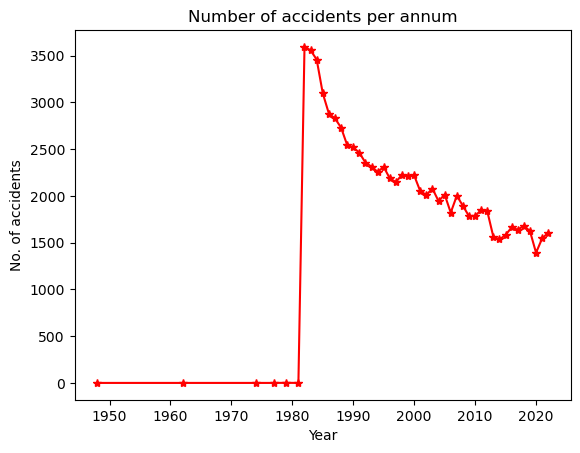

In [50]:
df["event_date"]=pd.to_datetime(df["event_date"]) #This ensure the date is the correct format
df["year"]=df["event_date"].dt.year #This extracts the year and add it to a column "year"

#Count the number of accidents per year and sort them in order
accident_pa=df["year"].value_counts().sort_index()

#Plot the graph
plt.plot(accident_pa.index,accident_pa.values,marker="*",color="r")
plt.title("Number of accidents per annum")
plt.xlabel("Year")
plt.ylabel("No. of accidents")


## 2. Analyse accidents by weather conditions

This visualisation shows that airplane safety is adversely affected by weather conditions as more than 90% of accidents occur during adverse conditions

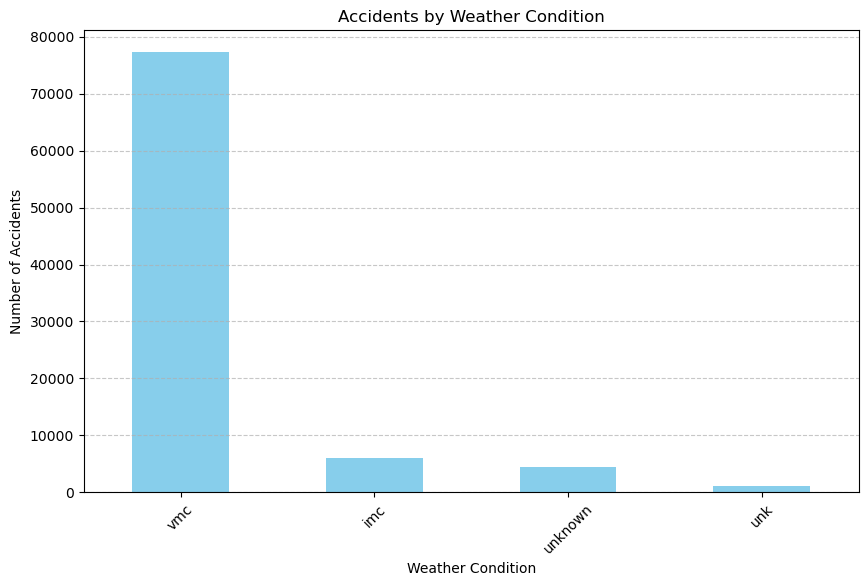

In [51]:

# Count accidents by each weather condition
weather_accidents = df['weather_condition'].value_counts()


# Plot weather accidents
weather_accidents.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3.Analyse the number of accidents per flight phase 

Majority of accidents occur within the landing and take-off phase of flights

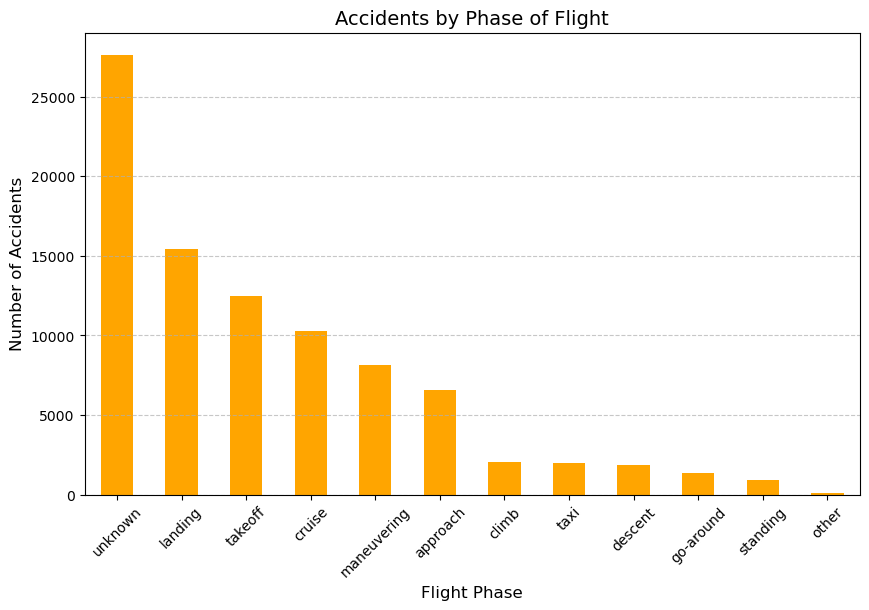

In [52]:
 #Count accidents by flight phase
flight_phase_accidents = df['broad_phase_of_flight'].value_counts()

# Visualize accidents by flight phase
plt.figure(figsize=(10, 6))
flight_phase_accidents.plot(kind='bar', color='orange')
plt.title('Accidents by Phase of Flight', fontsize=14)
plt.xlabel('Flight Phase', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4.Analyse the number of accidents by severity

From the visualisation we can see that a majority of accidents more than 80% are non-fatal

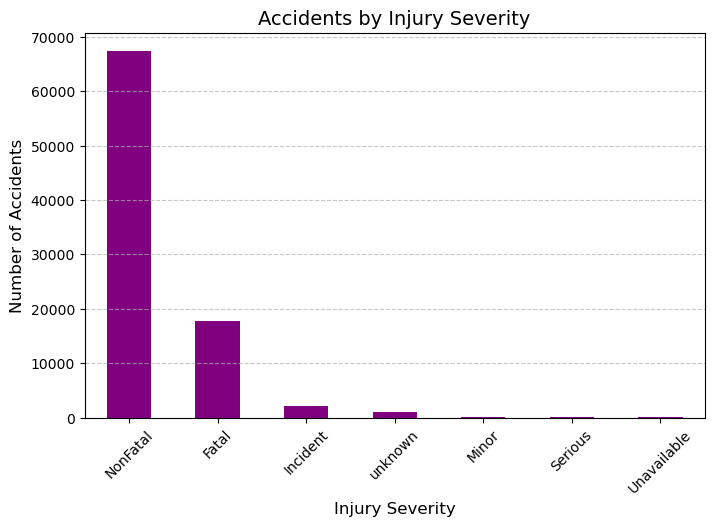

In [53]:
df["injury_severity"]=df["injury_severity"].str.replace("[^a-zA-Z]","",regex=True)
# Count accidents by injury severity
injury_severity_counts = df['injury_severity'].value_counts()

# Visualize injury severity distribution
plt.figure(figsize=(8, 5))
injury_severity_counts.plot(kind='bar', color='purple')
plt.title('Accidents by Injury Severity', fontsize=14)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()